# Titanic Project with Keras and Deep Learning

## In this lesson, we will create a classification model with Deep Learning for the passengers who died and did not die on the Titanic

<img src=https://image.kurier.at/images/cfs_landscape_616w_347h/1133253/c_TitanicFilms-010_AP.jpg width='400'>

In [1]:
# pip install tensorflow

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('ttrain.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df2=pd.read_csv('ttest.csv')

In [7]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df2.shape

(418, 11)

In [9]:
df=pd.concat([df,df2])

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [15]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.')

In [16]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [17]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Dona','Lady'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Dr','Col','Major','Don','Capt','Sir','Jonkheer'],'Mr')

In [18]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [19]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [20]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [21]:
df['Fare'].value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [22]:
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [23]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [24]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [25]:
df=pd.get_dummies(df,drop_first=True)

In [26]:
train=df[:891]
test=df[891:]

In [27]:
x_train=train.drop(['Survived'],axis=1)
y_train=train['Survived']

In [28]:
test1=test.drop(['Survived'],axis=1)

In [29]:
test1

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,True,True,False,False,True,False
1,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,2,62.0,0,0,9.6875,True,True,False,False,True,False
3,3,27.0,0,0,8.6625,True,False,True,False,True,False
4,3,22.0,1,1,12.2875,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,True,False,True,False,True,False
414,1,39.0,0,0,108.9000,False,False,False,False,False,True
415,3,38.5,0,0,7.2500,True,False,True,False,True,False
416,3,30.0,0,0,8.0500,True,False,True,False,True,False


In [30]:
import tensorflow as tf

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history=model.fit(x_train,y_train,epochs=500,batch_size=32, validation_split=.20,verbose=1)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6220 - loss: 0.6639 - val_accuracy: 0.7151 - val_loss: 0.5624
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6761 - loss: 0.6091 - val_accuracy: 0.7151 - val_loss: 0.5701
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6755 - loss: 0.6066 - val_accuracy: 0.7207 - val_loss: 0.5576
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6773 - loss: 0.5881 - val_accuracy: 0.7263 - val_loss: 0.5415
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.6708 - loss: 0.6082 - val_accuracy: 0.7374 - val_loss: 0.5339
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.6623 - loss: 0.6205 - val_accuracy: 0.7151 - val_loss: 0.5284
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6758 - loss: 0.5823 - val_accuracy: 0.7318 - val_loss: 0.5239
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.6683 - loss: 0.6030 - val_accuracy: 0.72

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.8171 - loss: 0.4347 - val_accuracy: 0.8268 - val_loss: 0.3770
Epoch 52/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.7940 - loss: 0.4598 - val_accuracy: 0.8380 - val_loss: 0.3786
Epoch 53/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.7945 - loss: 0.4350 - val_accuracy: 0.8324 - val_loss: 0.3873
Epoch 54/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.8363 - loss: 0.4306 - val_accuracy: 0.8324 - val_loss: 0.3715
Epoch 55/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8045 - loss: 0.4298 - val_accuracy: 0.8436 - val_loss: 0.3733
Epoch 56/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8253 - loss: 0.4110 - val_accuracy: 0.8492 - val_loss: 0.3812
Epoch 57/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.7881 - loss: 0.4622 - val_accuracy: 0.8380 - val_loss: 0.3690
Epoch 58/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.8025 - loss: 0.4445 - val_accuracy:

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8320 - loss: 0.3928 - val_accuracy: 0.8492 - val_loss: 0.3726
Epoch 102/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8172 - loss: 0.4093 - val_accuracy: 0.8547 - val_loss: 0.3674
Epoch 103/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8390 - loss: 0.3913 - val_accuracy: 0.8380 - val_loss: 0.3636
Epoch 104/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8149 - loss: 0.4203 - val_accuracy: 0.8380 - val_loss: 0.3605
Epoch 105/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8136 - loss: 0.4050 - val_accuracy: 0.8324 - val_loss: 0.3647
Epoch 106/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8130 - loss: 0.4242 - val_accuracy: 0.8492 - val_loss: 0.3591
Epoch 107/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8224 - loss: 0.3939 - val_accuracy: 0.8436 - val_loss: 0.3584
Epoch 108/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.8296 - loss: 0.4015 - val_accuracy: 0.84

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8263 - loss: 0.4031 - val_accuracy: 0.8603 - val_loss: 0.3618
Epoch 152/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8557 - loss: 0.3560 - val_accuracy: 0.8547 - val_loss: 0.3605
Epoch 153/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.8279 - loss: 0.3979 - val_accuracy: 0.8603 - val_loss: 0.3653
Epoch 154/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8230 - loss: 0.3958 - val_accuracy: 0.8603 - val_loss: 0.3541
Epoch 155/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.8456 - loss: 0.3775 - val_accuracy: 0.8547 - val_loss: 0.3613
Epoch 156/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.8392 - loss: 0.3840 - val_accuracy: 0.8492 - val_loss: 0.3634
Epoch 157/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.8425 - loss: 0.3676 - val_accuracy: 0.8380 - val_loss: 0.4315
Epoch 158/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.8049 - loss: 0.4300 - val_ac

Epoch 201/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8455 - loss: 0.3645 - val_accuracy: 0.8492 - val_loss: 0.3675
Epoch 202/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8430 - loss: 0.3725 - val_accuracy: 0.8603 - val_loss: 0.3600
Epoch 203/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8453 - loss: 0.3546 - val_accuracy: 0.8436 - val_loss: 0.3755
Epoch 204/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8479 - loss: 0.3687 - val_accuracy: 0.8547 - val_loss: 0.3589
Epoch 205/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.8440 - loss: 0.3743 - val_accuracy: 0.8603 - val_loss: 0.3715
Epoch 206/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8361 - loss: 0.3890 - val_accuracy: 0.8547 - val_loss: 0.3692
Epoch 207/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8274 - loss: 0.3833 - val_accuracy: 0.8492 - val_loss: 0.3746
Epoch 208/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8416 - loss: 0

Epoch 251/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.3762 - val_accuracy: 0.8436 - val_loss: 0.3711
Epoch 252/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8336 - loss: 0.3725 - val_accuracy: 0.8436 - val_loss: 0.3703
Epoch 253/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.8750 - loss: 0.3338 - val_accuracy: 0.8324 - val_loss: 0.3725
Epoch 254/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.8625 - loss: 0.3602 - val_accuracy: 0.8436 - val_loss: 0.3758
Epoch 255/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8512 - loss: 0.3611 - val_accuracy: 0.8212 - val_loss: 0.3766
Epoch 256/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8472 - loss: 0.3613 - val_accuracy: 0.8436 - val_loss: 0.3812
Epoch 257/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8485 - loss: 0.3597 - val_accuracy: 0.8324 - val_loss: 0.3724
Epoch 258/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8569 - loss: 0.3

Epoch 301/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.8276 - loss: 0.3837 - val_accuracy: 0.8268 - val_loss: 0.3903
Epoch 302/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.8350 - loss: 0.3555 - val_accuracy: 0.8603 - val_loss: 0.3717
Epoch 303/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8508 - loss: 0.3530 - val_accuracy: 0.8380 - val_loss: 0.3768
Epoch 304/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.8622 - loss: 0.3402 - val_accuracy: 0.8436 - val_loss: 0.3668
Epoch 305/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.8525 - loss: 0.3556 - val_accuracy: 0.8324 - val_loss: 0.3741
Epoch 306/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8575 - loss: 0.3410 - val_accuracy: 0.8324 - val_loss: 0.3764
Epoch 307/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.8589 - loss: 0.3460 - val_accuracy: 0.8212 - val_loss: 0.3795
Epoch 308/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.8293 - loss: 0

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8460 - loss: 0.3417 - val_accuracy: 0.8324 - val_loss: 0.3742
Epoch 351/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.8515 - loss: 0.3340 - val_accuracy: 0.8324 - val_loss: 0.3765
Epoch 352/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.8462 - loss: 0.3271 - val_accuracy: 0.8212 - val_loss: 0.3815
Epoch 353/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.8465 - loss: 0.3426 - val_accuracy: 0.8380 - val_loss: 0.3771
Epoch 354/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8594 - loss: 0.3533 - val_accuracy: 0.8436 - val_loss: 0.3707
Epoch 355/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8488 - loss: 0.3590 - val_accuracy: 0.8268 - val_loss: 0.3978
Epoch 356/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.8748 - loss: 0.3282 - val_accuracy: 0.8324 - val_loss: 0.3827
Epoch 357/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.8442 - loss: 0.3366 - val_ac

Epoch 400/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8556 - loss: 0.3451 - val_accuracy: 0.8324 - val_loss: 0.3696
Epoch 401/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.8564 - loss: 0.3514 - val_accuracy: 0.8268 - val_loss: 0.3905
Epoch 402/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8491 - loss: 0.3647 - val_accuracy: 0.8436 - val_loss: 0.3732
Epoch 403/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8638 - loss: 0.3266 - val_accuracy: 0.8324 - val_loss: 0.3779
Epoch 404/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.8466 - loss: 0.3295 - val_accuracy: 0.8324 - val_loss: 0.3869
Epoch 405/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8354 - loss: 0.3529 - val_accuracy: 0.8380 - val_loss: 0.3695
Epoch 406/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8581 - loss: 0.3212 - val_accuracy: 0.8436 - val_loss: 0.3755
Epoch 407/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8465 - loss: 0.330

Epoch 450/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.8684 - loss: 0.3293 - val_accuracy: 0.8436 - val_loss: 0.3726
Epoch 451/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8690 - loss: 0.3096 - val_accuracy: 0.8324 - val_loss: 0.3733
Epoch 452/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.8628 - loss: 0.3248 - val_accuracy: 0.8380 - val_loss: 0.3859
Epoch 453/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.8475 - loss: 0.3480 - val_accuracy: 0.8324 - val_loss: 0.3772
Epoch 454/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8558 - loss: 0.3202 - val_accuracy: 0.8436 - val_loss: 0.3807
Epoch 455/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.8692 - loss: 0.3293 - val_accuracy: 0.8380 - val_loss: 0.3797
Epoch 456/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.8665 - loss: 0.3130 - val_accuracy: 0.8436 - val_loss: 0.3709
Epoch 457/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8527 - loss: 0.347

Epoch 500/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.8624 - loss: 0.3227 - val_accuracy: 0.8436 - val_loss: 0.3698


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,755 (14.67 KB)

 Trainable params: 1,251 (4.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,504 (9.79 KB)

In [35]:
scores=model.evaluate(x_train,y_train)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8688 - loss: 0.3205


In [36]:
import matplotlib.pyplot as plt

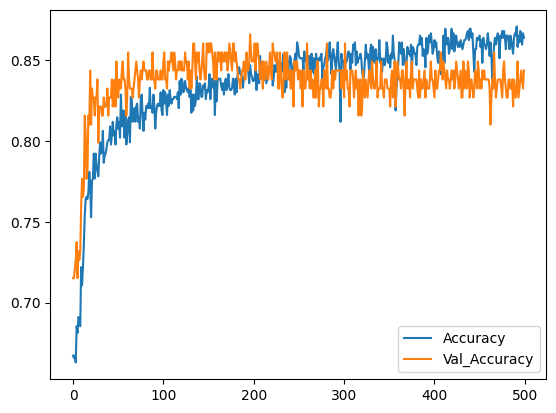

In [37]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

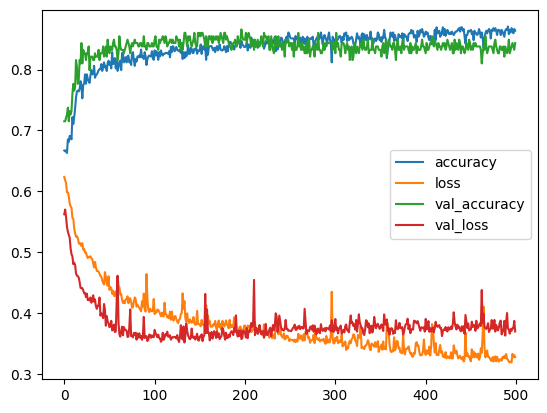

In [38]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

In [44]:
tahmin=model.predict(test1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [45]:
tahmin

array([[5.40701151e-02],
       [9.50973034e-01],
       [9.49792098e-03],
       [1.30477294e-01],
       [7.34296024e-01],
       [5.24533764e-02],
       [1.83532313e-01],
       [5.44614047e-02],
       [8.77470732e-01],
       [1.08007463e-02],
       [1.47577271e-01],
       [4.82002914e-01],
       [9.71792936e-01],
       [7.72849610e-03],
       [9.94432211e-01],
       [9.57289219e-01],
       [1.21770285e-01],
       [1.86347187e-01],
       [7.21961930e-02],
       [9.89680290e-01],
       [1.63910791e-01],
       [3.27813178e-02],
       [9.85523462e-01],
       [6.90426171e-01],
       [7.15065658e-01],
       [5.54636773e-03],
       [9.99282658e-01],
       [1.79860026e-01],
       [5.09757042e-01],
       [1.36067748e-01],
       [1.30232964e-02],
       [1.83791853e-02],
       [5.80266058e-01],
       [7.02882886e-01],
       [3.46638054e-01],
       [1.73761576e-01],
       [5.81863344e-01],
       [5.60007513e-01],
       [9.26499665e-02],
       [6.87727571e-01],


In [46]:
sonuc=pd.DataFrame()

In [47]:
sonuc['PassengerId']=df2['PassengerId']
sonuc['Survived']=tahmin

In [48]:
sonuc

,PassengerId,Survived
0,892,0.054070
1,893,0.950973
2,894,0.009498
3,895,0.130477
4,896,0.734296
...,...,...
413,1305,0.148627
414,1306,0.999978
415,1307,0.158247
416,1308,0.148627


In [49]:
sonuc["Survived"]=sonuc["Survived"].map(lambda s:1 if s>=0.5 else 0 ) 

In [50]:
sonuc

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
sonuc.to_csv("titanic_tahmin2.csv",index=False)

# Here we got accuracy 0.86. On Kaggle it is 0.76